In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from utils import *

init_printing(use_latex='mathjax')

# Preliminary: Quadratic equation

> In this section, we will review some properties of quadratic equations, which we will use continuously to do the linear stability analysis of Turing models. Therefore, it is essential to have a clear understanding of them.

> We will see that the type and sign of the largest root of a quadratic equation can be specified from the coefficients of the equation. There are four different possibilities that latter we refer to them by the Latin numerals introduced in the following section.

Let us start with a quadratic equation of $\lambda$

<h3><center>$f(\lambda) = \lambda^2 - b \lambda + c = 0$,</center> (1)</h3>

for constants $b$ and $c$. The first and second derivatives of $f(\lambda)$ are
<h3><center>$\frac{df}{d \lambda} = 2\lambda - b $,</center>(2)</h3>

and
<h3><center>$\frac{d^2f}{d \lambda^2} = 2 > 0 $.</center>(3)</h3>

Equation (3) implies that $f(\lambda)$ is convex, and solving equation (2) finds the location of the minimum at
<h3><center>$\lambda_{m} = \frac{b}{2} $,</center>(4)</h3>

where the value of the function at its minimum yields as
<h3><center>$f(\lambda_{m}) = -\frac{b}{2} + c $.</center>(5)</h3>

When we write the solution of the equation (1), we can see
<h3><center>$\lambda_{\pm} = \frac{b}{2} \pm \sqrt{\frac{b^2}{4} - c}$</center></h3>

or, using equatin (4)
<h3><center>$\lambda_{\pm} = \lambda_{m} \pm \sqrt{\lambda_{m}^2 - c}$</center>(6)</h3>

and also we can see the discriminant of the equation (1) is
<h3><center>$\Delta \equiv \frac{b^2}{4} - c = \lambda_{m}^2 - c$.</center>(7)</h3>


__Note 1:__ Remember that in finding the eigenvalues of a square matrix, say $\boldsymbol{M}$, one must solve the characteristic equation
<h4><center>$det(\boldsymbol{M} - \lambda \boldsymbol{I}) = 0$</center></h4>

In the resulting polynomial, the coefficient of the highest power of $\lambda$ is always one (known as [monic polynomials](https://en.wikipedia.org/wiki/Monic_polynomial)). And this is why we set the coefficient of $\lambda^2$ equal to one in equation (1).

__Note 2:__ The above argument is valid in general for an equation
<h4><center>$a\lambda^2 - b \lambda + c = 0$</center></h4>

for $a > 0$ too, since we can simply rewrite the equation as
<h4><center>$\lambda^2 - \frac{b}{a} \lambda + \frac{c}{a} = 0$</center></h4>

which is the same as equation (1).





# Four different cases

Let us plot equation (1) to see how the sign of $\lambda_m$ and $c$ determine the shape and location of roots. As we can see in the blow plots, there are four different combinations:

1) __Type (I)__   for $\lambda_m > 0$, $\lambda_m^2 < c$: Roots are a pair of complex conjugates.

2) __Type (II)__  for $\lambda_m > 0$, $\lambda_m^2 > c$: Since $\lambda_m > 0$, the larger root, or $\lambda_{+}$, is always positive.

3) __Type (III)__ for $\lambda_m < 0$, $\lambda_m^2 < c$: Roots are a pair of complex conjugates.

4) __Type (IV)__  for $\lambda_m < 0$, $\lambda_m^2 > c$: Depending on the sign of $c$, the larger root can be positive or negative:
   - If $c > 0$, then $\lambda_{+}$, is always negative.
   - Otherwise, for $c < 0$, $\lambda_{+}$, is always positive.

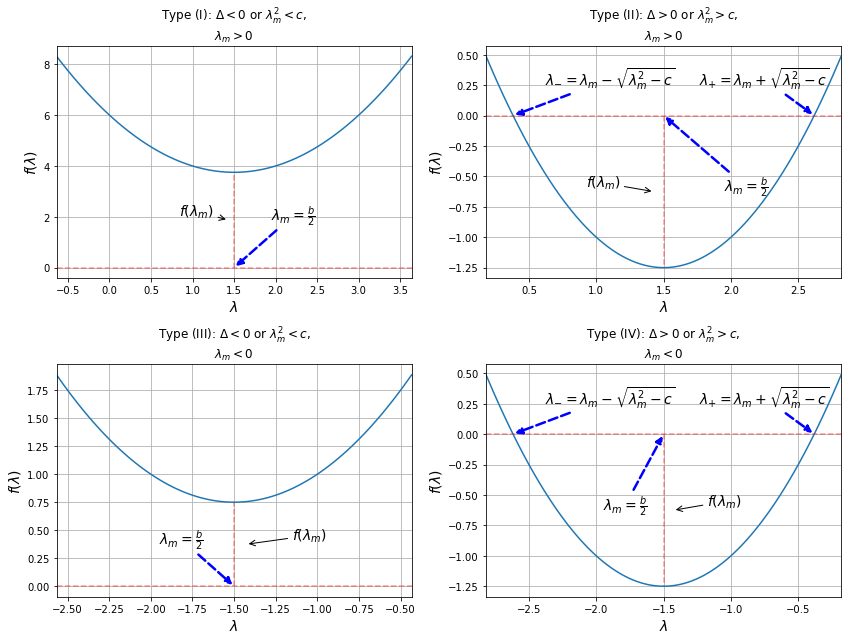

In [28]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(221)
plt.title(r"Type (I): $\Delta < 0$ or $\lambda_m^2 < c$," "\n" "$\lambda_m > 0$")
plot_quadratic(3, 6, ax)
ax = fig.add_subplot(222)
plt.title(r"Type (II): $\Delta > 0$ or $\lambda_m^2 > c$," "\n" "$\lambda_m > 0$")
plot_quadratic(3, 1, ax)

ax = fig.add_subplot(223)
plt.title(r"Type (III): $\Delta < 0$ or $\lambda_m^2 < c$," "\n" "$\lambda_m < 0$")
plot_quadratic(-3, 3, ax)
ax = fig.add_subplot(224)
plt.title(r"Type (IV): $\Delta > 0$ or $\lambda_m^2 > c$," "\n" "$\lambda_m < 0$")
plot_quadratic(-3, 1, ax)
plt.tight_layout()
plt.show()

# Eigenvalues of a $2 \times 2$ matrix

In this section, we will find the eigenvalues of a $2 \times 2$ matrix. By using the properties of quadratic equations, we can specify the sign of the largest eigenvalue.

The eigenvalues of a matrix
<h3><center>$\boldsymbol{M}= \left[\begin{matrix}A & B\\C & D\end{matrix}\right]$,</center>(8)</h3>

are the solutions of the characteristic equation
<h4><center>$det(\boldsymbol{M} - \lambda \boldsymbol{I}) = \left|\begin{matrix}A-\lambda & B\\C & D-\lambda\end{matrix}\right| = \lambda^2 - (A+D)\lambda+ (AD- BC) = 0$.</center>(9)</h4> 

One can rewrite the last quadratic equation as
<h4><center>$\lambda^2 - tr(\boldsymbol{M}) \lambda+ det(\boldsymbol{M}) = 0$,</center>(10)</h4>

which is equavalent to equation (1) for
<h4><center>$b = tr(\boldsymbol{M}), \qquad c = det(\boldsymbol{M})$.</center>(11)</h4>

Here, the $\lambda_m$ finds as
<h4><center>$\lambda_m = \frac{tr(\boldsymbol{M})}{2}$,</center>(12)</h4>

and therefore by using equation (6), it is easy to find the eigenvalues as
<h3><center>$\lambda_{\pm} = \frac{tr(\boldsymbol{M})}{2} \pm \sqrt{\frac{tr(\boldsymbol{M})^2}{4} - det(\boldsymbol{M})}.$</center>(13)</h3>

and the sign of $\lambda_{+}$ will be determined as follows

1) __Type (I)__   for $\lambda_m > 0$, $\lambda_m^2 < c$: 

This is equivalent to $tr(\boldsymbol{M}) > 0$ and $tr(\boldsymbol{M})^2 < 4  det(\boldsymbol{M})$. Then, eigenvalues are a pair of complex conjugates.

2) __Type (II)__  for $\lambda_m > 0$, $\lambda_m^2 > c$: 

Equivalently, $tr(\boldsymbol{M}) > 0$ and $tr(\boldsymbol{M})^2 > 4  det(\boldsymbol{M})$. So, the larger eigenvalue is always positive, $\lambda_{+} > 0$. 


3) __Type (III)__ for $\lambda_m < 0$, $\lambda_m^2 < c$: 

This is equivalent to $tr(\boldsymbol{M}) < 0$ and $tr(\boldsymbol{M})^2 < 4  det(\boldsymbol{M})$. Then, eigenvalues are a pair of complex conjugates.


4) __Type (IV)__  for $\lambda_m < 0$, $\lambda_m^2 > c$: 

For $tr(\boldsymbol{M}) < 0$ and $tr(\boldsymbol{M})^2 > 4 det(\boldsymbol{M})$, depending on the sign of $det(\boldsymbol{M})$, the larger eigenvalues can be positive or negative:
   - If $det(\boldsymbol{M}) > 0$, then $\lambda_{+} < 0$.
   - Otherwise, $\lambda_{+} > 0$.

# Turing Stability: No diffusion

Let us start with a two-component reaction-diffusion model:
<h3><center>$\frac{\partial u}{\partial t} = D_u \nabla^2 u + f(u, v)$,</center></h3>

<h3><center>$\frac{\partial v}{\partial t} = D_v \nabla^2 v +  g(u, v)$,</center></h3>

where $u$ and $v$ are the concentration of two spices, $D_u$ and $D_v$ are the diffusion coefficients, and $f(u,v)$ and $g(u,v)$, or kinetic terms, are two given functions.

For a given set of parameters, to study the capability of a Turing system to produce steady-state patterns, first, we assume a non-diffusive model ($D_v = D_v = 0$). Then, one needs to find one or more stationary states that simultaneously are the solution of  $f(u, v)$ and $g(u, v)$, or equivalently
<h4><center>$f(u, v) = 0$,</center></h4>

<h4><center>$g(u, v) = 0$.</center></h4>

Denoting the solutions of the above system of equations by $u_0$ and $v_0$, next, one needs to linearise kinetic terms by writing the Jacobian of $f(u, v)$ and $g(u,v)$, evaluated at $u_0$ and $v_0$ as

<h3><center>$\boldsymbol{J_0}= \left. \left[\begin{matrix}\frac{\partial f}{\partial u} & \frac{\partial f}{\partial v}\\\frac{\partial g}{\partial u} & \frac{\partial g}{\partial v}\end{matrix}\right]\right|_{(u_0, v_0)} \equiv \left[\begin{matrix} f_u & f_v\\ g_u &  g_v\end{matrix}\right]$,</center>(14)</h3>

where we used the subscript (e.g. $f_u \equiv \left. \frac{\partial f}{\partial u}\right|_{(u_0, v_0)}$) to show the partial derivatives for less cluttered notation.

The stability of the non-diffusive solutions depends on the signs of the eigenvalues of $\boldsymbol{J_0}$ such that:

1) Negative eigenvalues are equivalent to a stable solution.

2) One or more positive eigenvalue makes the solution unstable.

Note that it is sufficient to check the sign of the largest eigenvalue to check the solutions' stability. At this moment, using what we have observed in previous sections, it is easy to find these conditions.

<h4><center>$tr(\boldsymbol{J_0}) = f_u + g_v$.</center></h4>

<h4><center>$det(\boldsymbol{J_0}) = f_u g_v - f_v g_u$.</center></h4>


<h4><center>$\lambda_{\pm} = \frac{f_u + g_v}{2} \pm \sqrt{\frac{(f_u + g_v)^2}{4} - (f_u g_v - f_v g_u)}.$</center></h4>

1) __Type (I)__ : 

If $f_u + g_v > 0$ and $(f_u + g_v)^2 < 4 (f_u g_v - f_v g_u)$, then, eigenvalues are a pair of complex conjugates.

2) __Type (II)__: 

If $f_u + g_v > 0$ and $(f_u + g_v)^2 > 4 (f_u g_v - f_v g_u)$, the larger eigenvalue is always positive, $\lambda_{+} > 0$, and the solution is unstable. 


3) __Type (III)__ : 

If $f_u + g_v < 0$ and $(f_u + g_v)^2 < 4 (f_u g_v - f_v g_u)$, then, eigenvalues are a pair of complex conjugates.



4) __Type (IV)__: 

If $f_u + g_v < 0$ and $(f_u + g_v)^2 > 4 (f_u g_v - f_v g_u)$, depending on the sign of $f_u g_v - f_v g_u$, the larger eigenvalues can be positive or negative:
   - If $f_u g_v - f_v g_u > 0$, then $\lambda_{+} < 0$ and the solution is stable.
   - Otherwise, $\lambda_{+} > 0$ and the solution is unstable.
   
Combining all the cases, we reach one condition: Turing stability only corresponds to Type IV, the first case for
<h3><center>$f_u + g_v < 0$,</center></h3>
<h3><center>$f_u g_v - f_v g_u > 0$.</center></h3>



#### Define a list of parameters

In [20]:
A, B, D_u, D_v, u, v = symbols('A, B, D_u, D_v, u, v', real=True)
k = symbols('k', integer=True)

> The Brusselator PDEs are as follows

<h3><center>$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + A - (B+1)u + u^2v$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v + Bu - u^2 v$</center></h3>
Then, we define kinetic terms as

<h3><center>$f(u,v) = A - (B+1)u + u^2v$</center></h3>
<h3><center>$g(u,v) = Bu - u^2 v$</center></h3>

In [21]:
f = A - (B + 1) * u + u**2 * v
g = B * u - u**2 * v
hprint("f(u,v) = ", f)
hprint("g(u,v) = ",g)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### which as a vector, we can define it like

In [22]:
Kinetic = Matrix([[f], [g]])
hprint(r"\boldsymbol{f}(u, v) = ", Kinetic)

<IPython.core.display.Latex object>

#### First, we find the fix points of the system without diffusion. 

<center>$f(u,v) = A - (B+1)u + u^2v = 0$</center>
<center>$g(u,v) = Bu - u^2 v = 0$</center>

The solution of the above system finds $u^*$ and $v^*$ such that
<center>$f(u^*, v^*) = 0$</center>
<center>$g(u^*, v^*) = 0$</center>
which are

In [23]:
u_star, v_star = solve(Kinetic, (u, v))[0]
hprint("u^* = ", u_star)
hprint("v^* = ", v_star)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### Next, to linearise the PDE system, we find the Jacobian of $(f, g)$ that evaluated at $(u^*, v^*)$ 

In [24]:
J = Kinetic.jacobian([u, v])
hprint(r"J= \frac{\partial \boldsymbol{f}_i}{\partial u_j} = ", J)
J = J.subs([(u, u_star), (v, v_star)])
hprint("J|_{(u^*, v^*)} =", J)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### And eigenvalues of the resulting matrix in terms of parameters $A$ and $B$ are

In [203]:
λ_1, λ_2 =  list(J.eigenvals().keys())
hprint("\lambda_1 = ", λ_1)
hprint("\lambda_2 = ", λ_2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### However, remeber that the eigenvalues of a matrix $J$ is the solution of the quadratic equation

<center>$\lambda^2 - Tr(J) \lambda +  Det(J)  = 0$,</center>

#### such that its solutions writes as

<center>$\lambda_{1,2} = \frac{Tr(J)}{2} \pm \sqrt{ (\frac{Tr(J)}{2})^2 - Det(J) }$,</center>

where $Tr(J)$ and $Det(J)$ are trace and determinant of the matrix $J$, respectively.

In [204]:
hprint("Tr(J) = ", J.trace())
hprint("Det(J) = ", J.det())

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### If we define

<center>$C =\frac{Tr(J)}{2} = \frac{B-1-A^2}{2}$</center>

#### the quadratic equation becomes

<center>$\lambda^2 - 2C \lambda +  A^2  = 0 \qquad$, (I)</center>

#### and its solutions find as

<center>$\lambda_{1,2} = C \pm \sqrt{ C^2 - A^2 }$,</center>


In [205]:
#λ_star = J.trace()/2
C = symbols("C")
λ_1 = C - sqrt(C**2 - A**2)
λ_2 = C + sqrt(C**2 - A**2)
hprint("\lambda_1 = ", λ_1)
hprint("\lambda_2 = ", λ_2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### And when we plot $f(\lambda) = \lambda^2 - 2C \lambda +  A^2 $ , we can see 

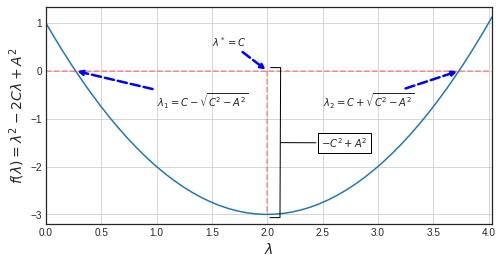

In [219]:


C_val = 2
A_val = 1
d = C_val**2 - A_val**2

xs = np.linspace(0, C_val+np.sqrt(d) + .3)
def f(λ, C, A):
    return λ**2 - 2 * C * λ + A**2

fig = plt.figure(figsize=(8,4))


ax = fig.add_subplot(111)

ax.annotate(r"$\lambda^* = C$", xy=(C_val, 0.0),
             xycoords='data',
             xytext=(1.5, 0.5),
             textcoords='data',
             arrowprops=dict(arrowstyle= '-|>',
                             color='blue',
                             lw=2.5,
                             ls='--')
           )

ax.annotate(r"$\lambda_1 = C - \sqrt{C^2 - A^2}$", xy=(C_val-np.sqrt(d), 0.0),
             xycoords='data',
             xytext=(1.0, -0.75),
             textcoords='data',
             arrowprops=dict(arrowstyle= '-|>',
                             color='blue',
                             lw=2.5,
                             ls='--')
           )

ax.annotate(r"$\lambda_2 = C + \sqrt{C^2 - A^2}$", xy=(C_val+np.sqrt(d), 0.0),
             xycoords='data',
             xytext=(2.5, -0.75),
             textcoords='data',
             arrowprops=dict(arrowstyle= '-|>',
                             color='blue',
                             lw=2.5,
                             ls='--')
           )

ax.annotate(r"$-C^2 + A^2$", xy=(C_val+.1, -1.5), 
            xytext=(C_val+.7, -1.65), 
            xycoords='data', 
            textcoords='data',
            ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white'),
            arrowprops=dict(arrowstyle='-[, widthB=7.5, lengthB=1.0', lw=1.0))

plt.plot(xs, f(xs, C_val, A_val))
plt.hlines(0, 0, 4,'r', '--', alpha=.4)
plt.vlines(C_val, 0, -3,'r', '--', alpha=.4)
plt.xlabel(r"$\lambda$", fontsize=14)
plt.ylabel(r"$f(\lambda) = \lambda^2 - 2C \lambda +  A^2$", fontsize=14)
plt.xlim([0, np.max(xs)])

plt.grid()
plt.show()

#### the maximum is at $\lambda^* = C$ and equal to $f(\lambda^*) = f(C) = -C^2 + A^2$, eigenvalues are 
<center>$\lambda_1 = C - \sqrt{ C^2 - A^2 }$,</center>
<center>$\lambda_2 = C + \sqrt{ C^2 - A^2 }$,</center>

#### Having stable solution without diffusion is equivalent to say $\lambda_2 = C + \sqrt{C^2 - A^2} \le 0$

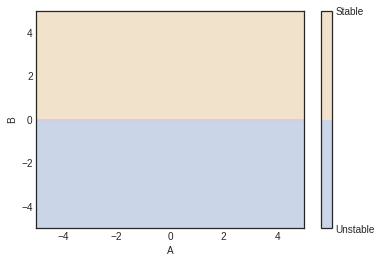

In [209]:
# Create a grid for C and A
L = 5
A_size = 200
C_size = 200
A_domain = L * np.linspace(-1, 1, A_size)
C_domain = L * np.linspace(-1, 1, C_size)
A_val, C_val = np.meshgrid(A_domain, C_domain, sparse=False, indexing="ij")

# Turn lambda_2 from symbolic function to a numeric function
λ_2_f = lambdify([A, C], λ_2, modules='numpy')
# Find lambda_2 values
domain = λ_2_f(np.complex64(A_val) , np.complex64(C_val))

stable = np.real(domain).copy()
stable[stable < 0] = -1
stable[stable > 0] = 0
plt.style.use('seaborn-white')

plt.contour(A_val, B_val, stable, cmap = 'RdGy',
            levels=[-1,-.5,0], origin='lower')

plt.contourf(A_val, B_val, stable, cmap = 'Pastel2',
            levels=[-1,-.5,0], origin='lower')


#plt.contourf(A_val, B_val, stable, cmap = 'Pastel1')
#plt.imshow(stable, extent=[-5, 5, -5, 5],
#           cmap='RdGy', alpha=0.5)
#plt.contourf(A_val, B_val, stable, cmap = 'Pastel1')
plt.xlabel("A")
plt.ylabel("B")
cbar = plt.colorbar()
cbar.set_ticks([-1, 0])
cbar.set_ticklabels(['Unstable', 'Stable'])
#cbar.set_label('Color Intensity')

plt.grid()
plt.show()

In [84]:
sqrt_delta = lambda_2.as_terms()[1][2]
Delta = list(sqrt_delta.as_powers_dict())[0]
Delta_f = lambdify([A, B],Delta, modules='numpy')
lprint("Original {0}:", "\Delta")
hprint("\Delta=",Delta)
print("Expand it:")
hprint("\Delta=",expand(Delta))
lprint(r"Replace it by {0}={1}:", r"\lambda^*", r"\frac{B-1-A^2}{2}")
lambda_star = symbols("lambda_star")
expand(Delta).subs((B-1-A**2)/2, lambda_star)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Expand it:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 4      2        2    2          
A  - 2⋅A ⋅B - 2⋅A  + B  - 2⋅B + 1

In [87]:
Delta = expand(Delta)

In [89]:
Delta.separate()

 4      2        2    2          
A  - 2⋅A ⋅B - 2⋅A  + B  - 2⋅B + 1

#### To study the linear stability of the system without diffusion, it is suffice to check the sign of the real part of the largest eigenvalue. Since $\lambda_2 > \lambda_1$, the instabiility condition solely depends on $\lambda_2$, so , we plot  $Re(\lambda_2)$ on $A-B$ domain.



#### Note that we use $\Delta = (A^{2} - 2 A - B + 1) (A^{2} + 2 A - B + 1)$ to find when the eigenvalues are complex.

In [19]:
sqrt_delta = lambda_2.as_terms()[1][2]
Delta = list(sqrt_delta.as_powers_dict())[0]
Delta_f = lambdify([A, B],Delta, modules='numpy')
hprint("\Delta=",Delta)

<IPython.core.display.Latex object>

In [20]:
lambda_f = lambdify([A, B],lambda_2, modules='numpy')

In [21]:
L = 5
A_size = 200
B_size = 200
A_domain = L * np.linspace(-1, 1, A_size)
B_domain = L * np.linspace(-1, 1, B_size)
A_val, B_val = np.meshgrid(A_domain, B_domain, sparse=False, indexing="ij")

Note: we first convert the real $A$ and $B$ to complex.

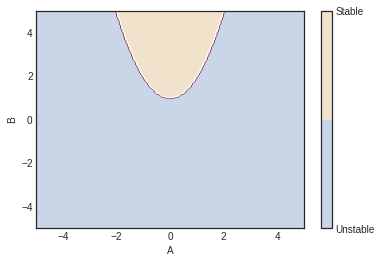

In [22]:
domain = lambda_f(np.complex64(A_val) , np.complex64(B_val))
stable = np.real(domain).copy()
stable[stable < 0] = -1
stable[stable > 0] = 0
plt.style.use('seaborn-white')

plt.contour(A_val, B_val, stable, cmap = 'RdGy',
            levels=[-1,-.5,0], origin='lower')

plt.contourf(A_val, B_val, stable, cmap = 'Pastel2',
            levels=[-1,-.5,0], origin='lower')


#plt.contourf(A_val, B_val, stable, cmap = 'Pastel1')
#plt.imshow(stable, extent=[-5, 5, -5, 5],
#           cmap='RdGy', alpha=0.5)
#plt.contourf(A_val, B_val, stable, cmap = 'Pastel1')
plt.xlabel("A")
plt.ylabel("B")
cbar = plt.colorbar()
cbar.set_ticks([-1, 0])
cbar.set_ticklabels(['Unstable', 'Stable'])
#cbar.set_label('Color Intensity')

plt.grid()
plt.show()

#### Including the diffusion, we find the eigen-values $\lambda_1(k)$ and $\lambda_2(k)$ from

<center>$J_2 = J - D$</center>

In [14]:
J_2 = J - Matrix([[D_u*k**2, 0], [0, D_v*k**2]])
hprint("J_2=", J_2)

<IPython.core.display.Latex object>

In [15]:
lambda_k_1, lambda_k_2 =  list(J_2.eigenvals().keys())
hprint("\lambda_1(k) = ", lambda_k_1)
hprint("\lambda_2(k) = ", lambda_k_2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [59]:
lambda_k_2.as_ordered_terms()

⎡                              ______________________________________________________________________________________
⎢  2           2        2     ╱  4      2        2     2      2     2      2    2           2           2           2
⎢-A    B  -Dᵤ⋅k    -Dᵥ⋅k    ╲╱  A  - 2⋅A ⋅B - 2⋅A ⋅Dᵤ⋅k  + 2⋅A ⋅Dᵥ⋅k  - 2⋅A  + B  - 2⋅B⋅Dᵤ⋅k  + 2⋅B⋅Dᵥ⋅k  - 2⋅B + Dᵤ 
⎢────, ─, ───────, ───────, ─────────────────────────────────────────────────────────────────────────────────────────
⎣ 2    2     2        2                                                                          2                   

__________________________________________________      ⎤
  4            4         2     2  4         2           ⎥
⋅k  - 2⋅Dᵤ⋅Dᵥ⋅k  + 2⋅Dᵤ⋅k  + Dᵥ ⋅k  - 2⋅Dᵥ⋅k  + 1       ⎥
──────────────────────────────────────────────────, -1/2⎥
                                                        ⎦

In [63]:
t1, t2, t3, t4, t5, t6 = lambda_k_2.as_ordered_terms()
lambda_star = t1+t2+t6
display(lambda_star)
lambda_k_22 = lambda_star + t3 + t4 + t5
lambda_k_22

   2        
  A    B   1
- ── + ─ - ─
  2    2   2

                              _______________________________________________________________________________________
   2           2       2     ╱  4      2        2     2      2     2      2    2           2           2           2 
  A    B   Dᵤ⋅k    Dᵥ⋅k    ╲╱  A  - 2⋅A ⋅B - 2⋅A ⋅Dᵤ⋅k  + 2⋅A ⋅Dᵥ⋅k  - 2⋅A  + B  - 2⋅B⋅Dᵤ⋅k  + 2⋅B⋅Dᵥ⋅k  - 2⋅B + Dᵤ ⋅
- ── + ─ - ───── - ───── + ──────────────────────────────────────────────────────────────────────────────────────────
  2    2     2       2                                                                          2                    

_________________________________________________    
 4            4         2     2  4         2         
k  - 2⋅Dᵤ⋅Dᵥ⋅k  + 2⋅Dᵤ⋅k  + Dᵥ ⋅k  - 2⋅Dᵥ⋅k  + 1    1
───────────────────────────────────────────────── - ─
                                                    2

#### Plot the wave-numbers envelope

/usr/local/anaconda3/envs/sympy/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/anaconda3/envs/sympy/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


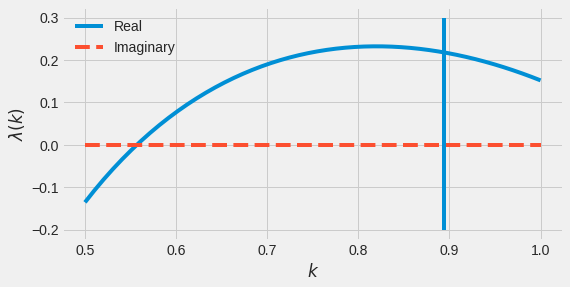

In [70]:
lambda_k_2_f = lambdify([k, A, B, D_u, D_v],lambda_k_2, modules='numpy')

ks = np.complex64(np.linspace(0.5, 1, num=50))

k_c_2 = ((B - 1) * D_v - A**2 * D_u)/(2 * D_u * D_v)
k_c_2_f = lambdify([A, B, D_u, D_v], k_c_2, modules='numpy')

fig = plt.figure(figsize=(8,4))
plt.style.use('fivethirtyeight')
plt.plot(ks, np.real(lambda_k_2_f(ks, A = 2, B = 3, D_u = 1, D_v = 10)), label='Real')
plt.plot(ks, np.imag(lambda_k_2_f(ks, A = 2, B = 3, D_u = 1, D_v = 10)), '--', label='Imaginary')

plt.vlines(np.sqrt(k_c_2_f(A = 2, B = 3, D_u = 1, D_v = 10)), -.2 , .3)
plt.xlabel(r"$k$")
plt.ylabel(r"$\lambda(k)$")
plt.legend()
#plt.grid()
plt.show()

#### Finding the maximum of $\lambda_2(k)$, namely $k_c$ as the dominant wave-number

In [45]:
solveset(lambda_k_2.diff(k), k)

⎧          ___________________________________________________________________________________________        _______
⎪         ╱      2                   _________          _________                                            ╱      2
⎪        ╱      A ⋅Dᵤ⋅Dᵥ      A⋅Dᵤ⋅╲╱ B⋅Dᵤ⋅Dᵥ    A⋅Dᵥ⋅╲╱ B⋅Dᵤ⋅Dᵥ        B⋅Dᵤ⋅Dᵥ            Dᵤ⋅Dᵥ            ╱      A 
⎨0, -   ╱   ─────────────── - ──────────────── - ──────────────── + ─────────────── - ─────────────── ,    ╱   ──────
⎪      ╱      2           2     2           2      2           2      2           2     2           2     ╱      2   
⎪    ╲╱     Dᵤ ⋅Dᵥ - Dᵤ⋅Dᵥ    Dᵤ ⋅Dᵥ - Dᵤ⋅Dᵥ     Dᵤ ⋅Dᵥ - Dᵤ⋅Dᵥ     Dᵤ ⋅Dᵥ - Dᵤ⋅Dᵥ    Dᵤ ⋅Dᵥ - Dᵤ⋅Dᵥ    ╲╱     Dᵤ ⋅Dᵥ
⎩                                                                                                                    

____________________________________________________________________________________         ________________________
                   _________          _________        

In [52]:
lambda_k_2.diff(k)#.subs(k, sqrt( ((B-1)*D_v - A**2 * D_u)/(2*D_u*D_v) ))

                                          2           2                                  2  3            3           
                                     - 2⋅A ⋅Dᵤ⋅k + 2⋅A ⋅Dᵥ⋅k - 2⋅B⋅Dᵤ⋅k + 2⋅B⋅Dᵥ⋅k + 2⋅Dᵤ ⋅k  - 4⋅Dᵤ⋅Dᵥ⋅k  + 2⋅Dᵤ⋅k +
-Dᵤ⋅k - Dᵥ⋅k + ──────────────────────────────────────────────────────────────────────────────────────────────────────
                    _________________________________________________________________________________________________
                   ╱  4      2        2     2      2     2      2    2           2           2           2  4        
               2⋅╲╱  A  - 2⋅A ⋅B - 2⋅A ⋅Dᵤ⋅k  + 2⋅A ⋅Dᵥ⋅k  - 2⋅A  + B  - 2⋅B⋅Dᵤ⋅k  + 2⋅B⋅Dᵥ⋅k  - 2⋅B + Dᵤ ⋅k  - 2⋅Dᵤ⋅

     2  3                              
 2⋅Dᵥ ⋅k  - 2⋅Dᵥ⋅k                     
───────────────────────────────────────
_______________________________________
    4         2     2  4         2     
Dᵥ⋅k  + 2⋅Dᵤ⋅k  + Dᵥ ⋅k  - 2⋅Dᵥ⋅k  + 1 